<h1 style="font-size:30px;">Linear Regression</h1>

Before studying deep neural networks, we need to cover the fundamental components of a simple (linear) neural network. We'll begin with the topic of linear regression. Since linear regression can be modelled as a linear neural network, it provides an excellent running example to introduce the essential components of neural networks. Regression is a form of supervised learning which aims to model the relationship between one or more input variables (features) and a continuous (target) variable. We assume that the relationship between the input variables $x$ and the target variable $y$ can be expressed as a weighted sum of the inputs (i.e., the model is linear in the parameters). In short, linear regression aims to learn a function that maps one or more input features to a single numerical target value.

We will begin by developing a mathematical model for linear regression and will demonstrate that it can be solved analytically using ordinary least squares (OLS), which has a closed-form solution called the normal equations. We will then show how this problem can be cast as a linear neural network in Keras using just a single neuron. Finally, we will demonstrate that linear regression can be used to fit a certain class of non-linear mathematical functions.
 
<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_01_linear_regression_feature_image.png' width=1000 align='center'><br/>

## Table of Contents
* [1 Linear Regression Model](#1-Linear-Regression-Model)
* [2 Ordinary Least Squares and the Normal Equations (Closed Form Solution)](#2-Ordinary-Least-Squares-and-the-Normal-Equations-(Closed-Form-Solution))
* [3 Fitting a Straight Line using the Normal Equations](#3-Fitting-a-Straight-Line-using-the-Normal-Equations)
* [4 Fitting a Straight Line using Keras](#4-Fitting-a-Straight-Line-using-Keras)
* [5 Fitting Non-Linear Data using Keras](#5-Fitting-Non\-Linear-Data-using-Keras)
* [6 Conclusion](#6-Conclusion)

## 1 Linear Regression Model

**Note**: The following model description is from Andrew Ng's machine learning class. This notation is commonly used in machine learning, and we are adopting it here to introduce the topic. As we transition to neural networks, some of the notation will change (for example, the parameters $\theta$ will be referred to as weights $w$); however, the discussion below and the use of subscripts and superscripts is helpful for communicating the concepts and dimensionality of the data.

Linear regression represents an important class of supervised learning problems in which one or more features are used to predict a scalar. More formally, the goal is to learn a function that maps input features to an output scalar value. The function is sometimes referred to as a **hypothesis** and for linear regression takes the general form below.

$$ h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ...$$

We often simplify the notation as follows:

$$ y' = \theta_0 + \theta_1x_1 + \theta_2x_2 + ...$$

Here, the $\theta_i$'s are the parameters (also called weights) parameterizing the space of linear functions mapping from $x$ to $y$. The problem is called **regression** when the target value is a continuous variable. When the target value represents a small number of discrete values (e.g., classes), we call it a **classification** problem. We postulate a hypothesis space in both cases and use input training data (features) to learn the parameters that fit the data. In this notebook, we will restrict our attention to regression problems.

In the case of a single input feature, we have the familiar form for the equation of a line where $y'$ represents the estimated value of $y$ given an input value of $x$ and the parameters $m$ abd $b$. Here, $b$ represents $\theta_0$ and $m$ represents $\theta_1$.

$$y' = mx + b$$

To simplify the general notation, we can introduce the convention of letting $x_0 = 1$ (this is the intercept term), so that:

$$ h(x) = \sum_{i=0}^{n} \theta_ix_i = \theta^Tx $$

where, on the right-hand side above, we are viewing $\theta$ and $x$ both as vectors, and here $n$ is the number of input variables (not counting $x_0$). This has no consequence on the results, but makes the mathematical notation more compact for the discussion that follows.

Now, given a training set, how do we pick, or learn, the parameters $\theta$s A reasonable approach is to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function
that measures, for each value of the $\theta$s, how close the $h(x(i))$’s are to the corresponding $y(i)$’s. We define the loss function:

$$ J(\theta) = \frac{1}{2}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

We have previously shown that the above loss function can be minimized using **gradient descent**. The next section below shows that linear regression can also be solved using a closed-form analytic solution referred to as the **normal equations**.


## 2 Ordinary Least Squares and the Normal Equations (Closed Form Solution)

In this section, we will develop an analytical solution to linear regression and will take the opportunity to also introduce linear algebra matrix notation to keep the equations more compact. 

Given a training set, we define a **design matrix** $X$ that can be represented as an $m$ x $n$ matrix that contains $m$ training examples in its rows and, $n$ represents the number of features in each training example. Often times the bias (or intercept) term is added to each row in the matrix in which case the matrix, becomes as an $m$ x $(n+1)$. <br><br>
$$
X = \begin{bmatrix}
- \hspace{2mm}( x^{(1)})^T \hspace{2mm}-\\
- \hspace{2mm}( x^{(2)})^T \hspace{2mm}-\\
       \vdots\\
- \hspace{2mm}( x^{(m)})^T \hspace{2mm}-\\
\end{bmatrix}
$$

Let $\vec{y}$ be the $m$-dimensional vector that contains all the target values from the training set.<br><br>

\begin{equation}
\vec{y} = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}
\end{equation}

Now, since $h(x^{(i)}) = (x^{(i)})^T θ$, we can easily verify that:<br><br>

\begin{equation}
X\theta - \vec{y} = \begin{bmatrix}
- \hspace{2mm}( x^{(1)})^T\theta \hspace{2mm}-\\
- \hspace{2mm}( x^{(2)})^T\theta \hspace{2mm}-\\
\vdots\\
- \hspace{2mm}( x^{(m)})^T\theta \hspace{2mm}-\\
\end{bmatrix}-
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}
\end{equation}

<br>

\begin{equation}
= \begin{bmatrix}
h_\theta(x^{(i)}) - y^{(i)} \\
\vdots\\
h_\theta(x^{(m)}) - y^{(m)} \\
\end{bmatrix}
\end{equation}

<br><br>
Using the fact that for a vector $z$, we have that $z^Tz = \sum_i z_i^2$:<br><br>

\begin{equation}
\frac{1}{2}(X\theta - \vec{y})^T(X\theta - \vec{y}) = \frac{1}{2}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 
\end{equation}

To minimize $J$, we compute the gradient of $J$ with respect to $\theta$ as follows:<br><br>

  $$ \nabla_\theta J(\theta) = \nabla_\theta \frac{1}{2} (X\theta - \vec{y})^T(X\theta - \vec{y}) $$
  
Carrying out the above gradient requires some matrix calculus and some matrix properties, which we will not delve into, but is easily found on the internet. The above gradient simplifies to the following expression:<br>

 $$ = X^TX\theta - X^T \vec{y} $$
 
To minimize $J$, we set its derivative to zero, and obtain the **normal equations**:<br><br>

 $$ X^TX\theta = X^T \vec{y} $$
 
Thus, the value of $\theta$ that minimizes $J(\theta)$ is given in closed-form by the following equation:<br><br>

$$ \theta = (X^TX)^{-1}X^T\vec{y} $$

<br><br>

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
block_plot = False

## 3 Fitting a Straight Line using the Normal Equations

We will begin by showing that the normal equations can be used to find the parameters of a straight line (slope and intercept) given a set of data points in two dimensions.

### 3.1 Create Convenience Functions

Let's first create a convenience function to generate some linear data with a small amount of added noise.

In [ ]:
def create_linear_data(num_data=100, y_offset=0, slope=1, stddev=.3):

    # Random manual seed for consistency.
    tf.random.set_seed(42) 

    # Create some linear data with a small amount of noise.
    X = 10 * tf.random.uniform(shape=[num_data])
    y = y_offset + slope * X + tf.random.normal(stddev=stddev, shape=[num_data])
    
    X = tf.reshape(X, (len(X), 1))
    y = tf.reshape(y, (len(y), 1))
    
    return X, y

In [ ]:
def plot_data(x, y, xlim=(0,10), ylim=(0,10)):
    plt.figure
    plt.plot(x, y, 'b.')
    plt.xlabel('x')
    plt.ylabel('y'), 
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show(block=block_plot)

### 3.2 Generate Linear Data

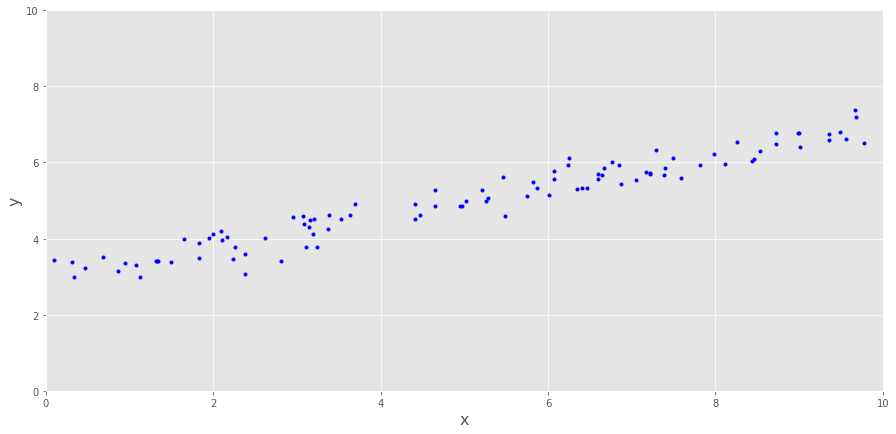

In [ ]:
# Create some data.
y_int = 3
slope = .4
X, y = create_linear_data(y_offset=y_int, slope=slope, stddev=0.3)

plot_data(X, y)

### 3.3 Implement Normal Equations

In [ ]:
def compute_theta(X, y):

    m = X.shape[0] # Number of samples.

    # Concatenate a 1 to the beginning of each feature vector.
    X = tf.concat((tf.ones((m, 1)), X), axis=1)
    y = tf.reshape(y, (m, 1))

    # Solve for theta using the Normal Equations.
    X_T      = tf.transpose(X)
    XT_X     = tf.tensordot(X_T, X, axes=1)
    XT_X_inv = tf.linalg.inv(XT_X)
    XT_y     = tf.tensordot(X_T, y, axes=1)
    theta    = tf.tensordot(XT_X_inv, XT_y, axes=1)

    return theta

### 3.4 Solve for the Model Parameters (slope and y-intercept)

In [ ]:
print('Actual Coefficients:\n')
print('Slope: ', slope)
print('Y-Int: ', y_int)
print('\n')

# Compute the parameters (theta) based on the closed-form solution using the Normal Equations.
theta = compute_theta(X, y)

slope = theta[0].numpy()
y_int = theta[1].numpy()

print('Predicted Coefficients:\n')
print('Slope: ', slope[0])
print('Y-int: ', y_int[0])


Actual Coefficients:

Slope:  0.4
Y-Int:  3


Predicted Coefficients:

Slope:  2.992422
Y-int:  0.39894462


### 3.5 Display the Results

In [ ]:
def predict_y(X, theta):

    X = tf.concat((tf.ones((X.shape[0], 1)), X), axis=1)
    pred_y = tf.matmul(X, theta)

    return pred_y

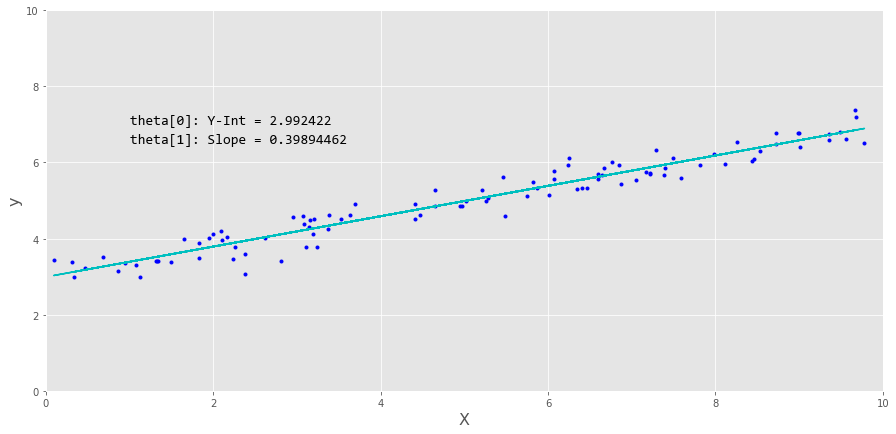

In [ ]:
pred_y = predict_y(X, theta)
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.text(1, 7.0, 'theta[0]: Y-Int = ' + str(slope[0]), fontsize=14, family='Consolas')
plt.text(1, 6.5, 'theta[1]: Slope = ' + str(y_int[0]), fontsize=14, family='Consolas')
plt.xlabel('X')
plt.ylabel('y');

### <font color="CornFlowerBlue">Discussion</font>

As you can see, using the normal equations to solve linear regression problems is very simple. However, there are several reasons why this approach can be problematic. Solving this equation requires inverting a matrix which can be computationally expensive, especially for very large problems which may include thousands of features. There is also an issue associated with its stability. Suppose that the matrix is not invertible due to numerical issues? There are methods that can mitigate some numerical problems, such as using what's known as the "pseudo" inverse, but this is not always ideal in practice, and these are some reasons why this approach is often not practical for large problems that we typically encounter in machine learning. 

## 4 Fitting a Straight Line using Keras

Let's now take a look at solving this problem using a very simple linear neural network. 

### 4.1 Mathematical Model
Create a simple linear model with one parameter (the slope) to model a straight line that passes through the origin. 

The goal is to predict $y$ given some value of $x$. To do this, we will fit a line that goes through the data points $(x_i, y_i)$. We will simplify the problem so that the line passes through the origin. The equation for such a line is:

$$
y = mx
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. Therefore, 

$$
y_i = m x_i
$$

The model has a single parameter $m$ (the slope of the line) that we wish to compute.

### 4.2 Modeling a Linear Neural Network in Keras
We restrict the model to a straight line that passes through the origin. Notice that this is very similar to the gradient descent notebook from the previous module, but rather than implementing all the details from scratch, we will use **Keras** to perform the same task. The network diagram below represents the simplest possible neural network. It has an input layer consisting of a single feature. Technically the input layer is not counted as a layer since there are no trainable parameters associated with it. The network has just a single layer consisting of a single neuron. The single-layer IS the output layer. The neuron has a linear activation function that simply multiplies the input feature $x$ by the weight $w$. For every training sample, the predicted output $y'$ is compared to the actual value from the training data, and the loss is computed. This allows us to compute the gradient with respect to $w$ and update the weight (slope) according to an input learning rate. All of these details are taken care of by Keras once we define the network model and call a function to train the network.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_01_linear_regression_wx.png' width=600 align='center'><br/>

The following steps summarize the workflow in Keras:

1. Build/Define a network model using either the Sequential API or the Functional API in Keras.
2. Compile the model with `model.compile()`
3. Train the model with `model.fit()`
4. Predict the output `model.predict()`

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_01_keras_workflow_basic.png' width=800 align='left'><br/>

### 4.3 Create the Keras Model

The bias term for the neuron will be set to zero in this example using the option `use_bias=False`.

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation=None, use_bias=False))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


### 4.4 Compile the Model

Compiling the model requires you to specify the type of loss function (in this case, mean square error: 'mse') and to also specify the specific type of optimizer to use. 

In [ ]:
model.compile(loss='mse', optimizer='adam')

### 4.5 Train the Model

Once the model is compiled, we can call the `fit` method to train the model. The required arguments include the training data and the number of epochs to train for. The `fit` method returns a `history` object that we can use to access the loss for each epoch.

In [ ]:
history = model.fit(X, y, epochs=50, verbose=0)

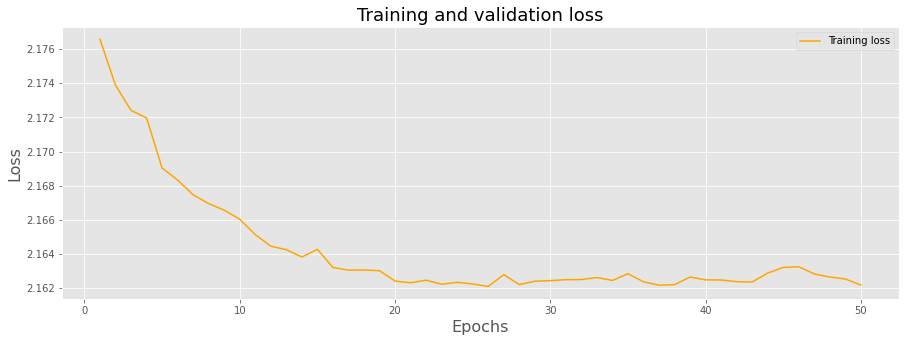

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4.6 Predict Model Parameters and Display Results

After the model has been trained, we can access the trained parameters directly from the model object.

In [ ]:
slope = model.layers[0].weights[0]
print('Slope: ', slope[0].numpy())

pred_y = model.predict(X)

Slope:  [0.85557485]


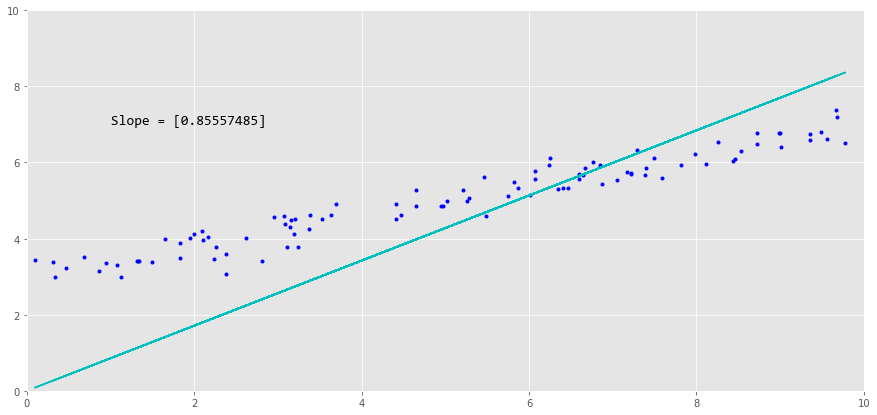

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-') 
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### <font color="CornFlowerBlue">Discussion</font>

The fitted line must pass through the origin since our model for the line only includes the slope, so it cannot fit the data very well, as shown in the plot above. Next, let's add the bias term to the network model and see how much better the fitted model performs. This is easily done in Keras by passing an input flag `use_bias=True` when we define the model.

### 4.7 Create the Keras Model with a Bias Term

In this section, we will model the bias term as shown in the network diagram below. 

<img src='./visuals/c4_01_linear_regression_wx_b.png' width=600 align='center'><br/>

In [ ]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,), activation=None, use_bias=True))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 4.8  Compile the Model

In [ ]:
model2.compile(loss='mse', optimizer="adam")

### 4.9 Train the Model

In [ ]:
history = model2.fit(X, y, epochs=2000, verbose=0)

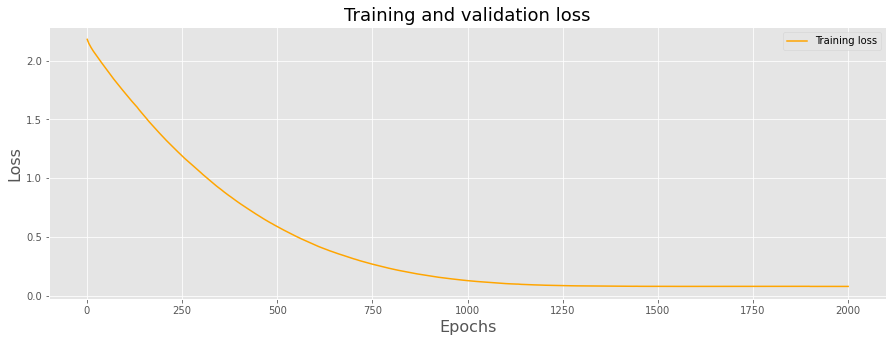

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4.10  Predict Model Parameters and Display Results

In [ ]:
slope = model2.layers[0].weights[0]
y_int = model2.layers[0].weights[1]
print('Slope: ', slope[0].numpy())
print('Y-Int: ', y_int.numpy())

pred_y = model2.predict(X)

Slope:  [0.39806193]
Y-Int:  [2.9915583]


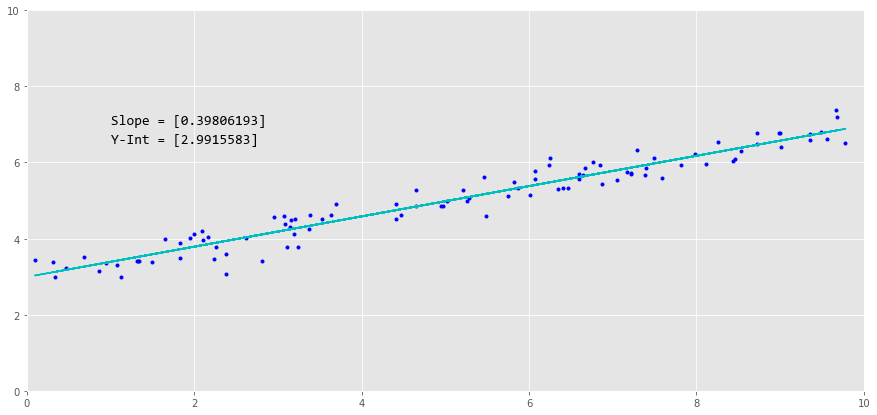

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.text(1, 6.5, 'Y-Int = ' + str(y_int.numpy()),    fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## 5 Fitting Non-Linear Data using Keras

In this section, we will use a single neuron to fit a non-linear mathematical function of the form below:

$$ y = \theta_0 + \theta_1xcos(x) + \theta_2x^2 + noise$$

Notice this is a non-linear function but it is *linear* in the parameters ($\theta_0, \theta_1, \theta_2$). In other words, the independent variables can be non-linear, as in the example above. The terms $xcos(x)$ and $x^2$ are the input features we will use to train the model.

An example of a functional form that is **not** linear in the parameters is given below since it cannot be expressed as the weighted sum of input features.

$$ y = \theta_0 + X^{\theta_1}cos(X + \theta_2)$$

### 5.1 Create Convenience Function

In [ ]:
def create_nonlinear_data(xmin=-10, xmax=10, num_data=100, theta_0=0, theta_1=.3, theta_2=.05, noise=.1):

    # Random manual seed for consistency.
    tf.random.set_seed(42) 
    
    X = np.linspace(xmin, xmax, num=num_data)
    y = theta_0 + theta_1*X*np.cos(X) + theta_2*X**2 + noise*np.random.normal(size=num_data)
    
    X = tf.reshape(X, (len(X), 1))
    y = tf.reshape(y, (len(y), 1))
    
    return X, y

### 5.2 Generate Non-linear Data

In [ ]:
# Create some data (non-linear function, but linear in the parameters).
theta_0 = -3
theta_1 = .3
theta_2 = .05
X, y = create_nonlinear_data(theta_0=theta_0, theta_1=theta_1, theta_2=theta_2, noise=.3)

# Create two features from the input data that match the functional form of the data we generated above.
Xf = tf.concat((X*tf.math.cos(X), X*X), axis=1)
temp = Xf.numpy()
print('Xf contains two features based on X: ', temp.shape)

Xf contains two features based on X:  (100, 2)


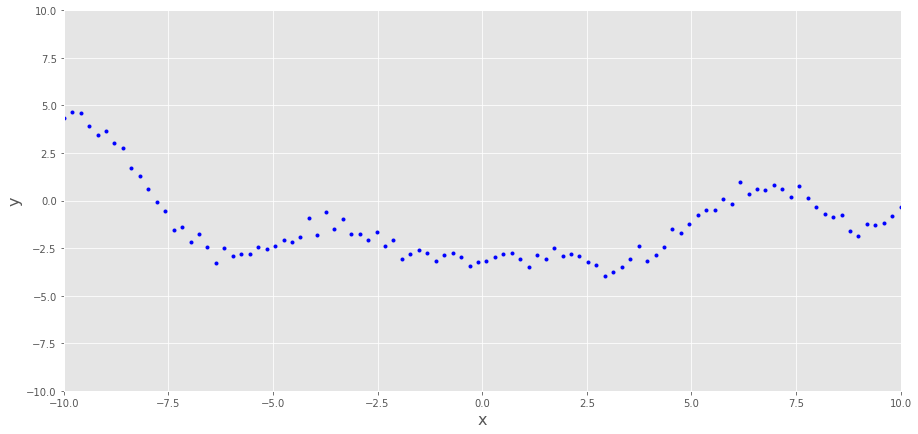

In [ ]:
plot_data(X, y, (-10, 10), (-10, 10))

### 5.3 Create the Keras Model

This model has two inputs that represent $xcos(x)$ and $x^2$ with corresponding weights $\theta_1$ ad $\theta_2$ respectively, and also a bias term to represent $\theta_0$. Notice that the model summary listed below has three trainable parameters ($\theta_0, \theta_1, \theta_2$).

In [ ]:
model3 = Sequential()
model3.add(Dense(1, input_shape=(2,), activation=None, use_bias=True))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 5.4 Compile the Model

In [ ]:
model3.compile(loss='mse', optimizer="adam")

### 5.5 Train the Model

In [ ]:
history = model3.fit(Xf, y, epochs=2000, verbose=0)

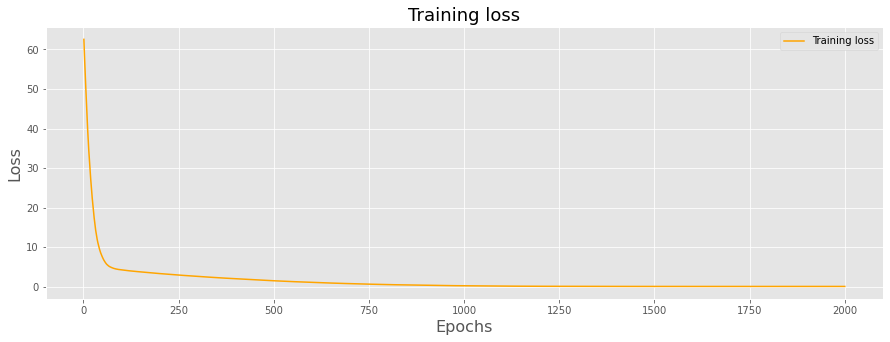

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 5.6 Predict Model Parameters and Display Results

In [ ]:
pred_theta_0 = model3.layers[0].bias[0].numpy();
temp = model3.layers[0].weights[0].numpy();
pred_theta_1 = temp[0]
pred_theta_2 = temp[1]

print('Actual Coefficients:\n')
print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('theta_2 = ', theta_2)
print('\n')
print('Predicted Coefficients:\n')
print('theta_0 = ', pred_theta_0)
print('theta_1 = ', pred_theta_1[0])
print('theta_2 = ', pred_theta_2[0])

pred_y = model3.predict(Xf)

Actual Coefficients:

theta_0 =  -3
theta_1 =  0.3
theta_2 =  0.05


Predicted Coefficients:

theta_0 =  -2.9964995
theta_1 =  0.28730252
theta_2 =  0.04890039


Notice that the parameters learned by the network are very close to the actual values that were used to generate the training data. As an exercise, you could try setting the noise to zero in the `create_nonlinear_data()` function call and confirm that the learned parameters match the parameters that were used to generate the training data.

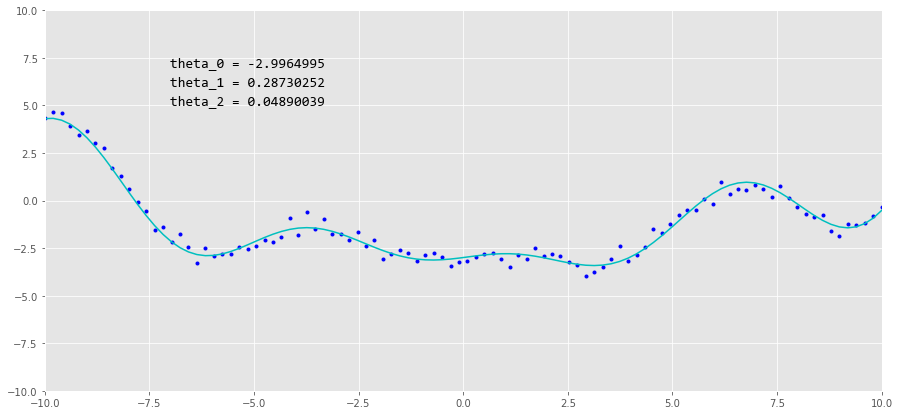

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(-7, 7.0, 'theta_0 = ' + str(pred_theta_0),    fontsize=14, family="Consolas")
plt.text(-7, 6.0, 'theta_1 = ' + str(pred_theta_1[0]), fontsize=14, family="Consolas")
plt.text(-7, 5.0, 'theta_2 = ' + str(pred_theta_2[0]), fontsize=14, family="Consolas")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## 6 Conclusion

In this notebook, we introduced the concept of linear regression in a machine learning context in which one or more features are used to predict a single scalar value. We covered the mathematical model and notation on which linear regression is based. 

We demonstrated that linear regression has a closed-form analytic solution derived from ordinary least squares, known as the normal equations but also highlighted that it’s often not a practical approach for many real-world problems and that gradient descent is most often the preferred method.

We showed that a solution to linear regression can also be viewed as a linear neural network, and we used Keras to help us model such as case. 

Finally, We also showed that some non-linear mathematical functions can be solved using linear regression as long as the model is linear in the parameters (i.e., the target value can be expressed as the weighted sum of the input features).